### Denetimsiz/Gözetimsiz Öğrenme (Unsupervised Learning)

In [1]:
# pip install yellowbrick

In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.cluster import KMeans # Kmeans 
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage, dendrogram # hiyerarşik kümeleme yöntemi
from sklearn.decomposition import PCA # temel bilesen yöntemi
from sklearn.model_selection import cross_val_score, GridSearchCV

In [3]:
df = pd.read_csv("USArrests.csv",index_col=0) # ilk sutun indeksi temsil eder bu yüzden ilk satırı indeks kolonu yaptık
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [4]:
df.isnull().any()

Murder      False
Assault     False
UrbanPop    False
Rape        False
dtype: bool

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [7]:
# uzaklık temelli ve gradient descent temelli yöntemlerin kullanımındaki 
# süreçlerde değişkenleri standartlaştırılması önemlidir. KMeans de bunlardan biri.

mms = MinMaxScaler((0,1))
df = mms.fit_transform(df) # dataframe fit_transform edildiğinde artık nump array'e dönüşür
df[0:5]

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512]])

### Temel Bileşen Analizi (Principal Component Analysis)

In [8]:
df = pd.read_csv("hitters.csv")
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [9]:
num_cols = [col for col in df.columns if df[col].dtypes != "O" and "Salary" not in col]

In [10]:
df = df[num_cols]

In [11]:
df.dropna(inplace=True)

In [12]:
pca = PCA()

In [13]:
ss = StandardScaler()
df = ss.fit_transform(df)

In [14]:
pca_fit = pca.fit_transform(df)

In [15]:
pca.explained_variance_ratio_ # değişkenlerin varyans oranları

array([4.60378552e-01, 2.60398491e-01, 1.03388605e-01, 5.36902121e-02,
       4.20784091e-02, 2.96359092e-02, 1.57079101e-02, 1.13928108e-02,
       7.83230398e-03, 5.87669497e-03, 3.74765194e-03, 3.09384056e-03,
       1.55679403e-03, 8.59034766e-04, 2.86873704e-04, 7.59064046e-05])

In [16]:
np.cumsum(pca.explained_variance_ratio_)
# varyansların kümülatif olarak toplamları
# yani ilk değişken tek basına veri setinin %46sını acıklıyormuş
# ilk iki değişken toplamda %72 oranında veri setini acıklıyormuş

array([0.46037855, 0.72077704, 0.82416565, 0.87785586, 0.91993427,
       0.94957018, 0.96527809, 0.9766709 , 0.9845032 , 0.9903799 ,
       0.99412755, 0.99722139, 0.99877819, 0.99963722, 0.99992409,
       1.        ])

#### Optimum Bileşen Sayısı Belirleme

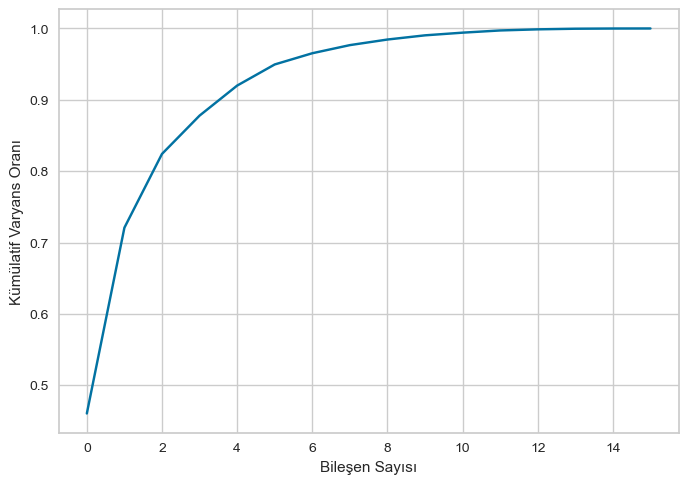

In [17]:
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Bileşen Sayısı")
plt.ylabel("Kümülatif Varyans Oranı")
plt.show()
# elbow, eğrinin şiddetlendiği yer
# bileşen sayısını 3 olarak belirledik

#### Final PCA

In [18]:
pca = PCA(n_components=3)
pca_fit = pca.fit_transform(df)

In [19]:
pca.explained_variance_ratio_

array([0.46037855, 0.26039849, 0.1033886 ])

In [20]:
np.cumsum(pca.explained_variance_ratio_)
# 3 boyuta indirgediğimiz değişkenler veri setinin %82'sini açıklıyor.

array([0.46037855, 0.72077704, 0.82416565])

### Temel Bileşen Regresyon Modeli  (PCR)

In [21]:
# ilk önce değişken boyutu indirgenir PCA sonra üzerine model PCR kurulur.
df = pd.read_csv("hitters.csv")
df.shape

(322, 20)

In [22]:
len(pca_fit)

322

In [23]:
num_cols = [col for col in df.columns if df[col].dtypes != "O" and "Salary" not in col]
len(num_cols)

16

In [24]:
others = [col for col in df.columns if col not in num_cols]

In [25]:
conc1 = pd.DataFrame(pca_fit,columns=["PC1","PC2","PC3"])

In [26]:
conc2 = df[others]

In [27]:
final_df = pd.concat([conc1, conc2],axis=1)

In [28]:
final_df.head()

,PC1,PC2,PC3,League,Division,Salary,NewLeague
0,-3.240106,-0.253173,0.776066,A,E,NaN,A
1,0.245488,1.302951,0.118040,N,W,475.0,N
2,0.603883,-2.617002,-0.698183,A,W,480.0,A
3,3.591276,0.547821,-1.049022,N,E,500.0,N
4,-2.264528,-0.698898,-1.290536,N,E,91.5,N


In [29]:
final_df.dropna(inplace=True)

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [31]:
binary_cols  = ["League","NewLeague","Division"]
lb = LabelEncoder()
for col in binary_cols:
    final_df[col] = lb.fit_transform(final_df[col])

In [32]:
X = final_df.drop(["Salary"],axis=1)
y = final_df.Salary

In [33]:
lnr = LinearRegression()

In [34]:
rmse_lnr = np.mean(np.sqrt(-cross_val_score(lnr,
                                        X,
                                        y,
                                        cv=5, 
                                        scoring="neg_mean_squared_error")))

In [35]:
rmse_lnr

345.6021106351968

In [36]:
y.mean()

535.9258821292775

In [37]:
cart = DecisionTreeRegressor()
rmse_cart = np.mean(np.sqrt(-cross_val_score(cart,
                                        X,
                                        y,
                                        cv=5, 
                                        scoring="neg_mean_squared_error")))

In [38]:
rmse_cart

374.47045652997235

In [39]:
cart_params = {"max_depth":range(1,11),
              "min_samples_split":range(2,20)}

In [40]:
cart_best_grid = GridSearchCV(cart,cart_params,cv=5,n_jobs=-1,verbose=True).fit(X,y)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [41]:
cart_best_grid.best_params_

{'max_depth': 3, 'min_samples_split': 19}

In [42]:
cart_final = DecisionTreeRegressor(**cart_best_grid.best_params_).fit(X,y)

In [43]:
rmse_cart = np.mean(np.sqrt(-cross_val_score(cart_final,
                                        X,
                                        y,
                                        cv=5, 
                                        scoring="neg_mean_squared_error")))

In [44]:
rmse_cart

330.1964109339104

### PCA Görselleştirme 

In [45]:
# Cok boyutlu veriyi 2 boyutta görselleştirme
pd.set_option("display.max_columns",None)
pd.set_option("display.width",500)

df = pd.read_csv("breast_cancer.csv")
df.head()

# görsel veriler üzerinde numerik formlara getirilmiş değişkenler

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [46]:
X = df.drop(["diagnosis","id"],axis=1)
y = df.diagnosis # iyi/kötü huylu

In [47]:
# öncelikle veri setini 2 boyuta indirgemeliyiz
def create_pca_df(X,y):
    X = StandardScaler().fit_transform(X) # bagımsızları standartlaştır
    pca = PCA(n_components=2) # pca hesabı yap
    pca_fit = pca.fit_transform(X) # değişken değerlerini dönüştür yani bileşenleri çıkart
    pca_df = pd.DataFrame(data=pca_fit,columns=["PC1","PC2"]) # bu bileşenleri df'ye çevir
    final_df = pd.concat([pca_df,
                          pd.DataFrame(y)],axis=1) # bagımlı degisken ile birleştir
    return final_df

In [48]:
pca_df = create_pca_df(X,y)
pca_df

,PC1,PC2,diagnosis
0,9.192837,1.948583,M
1,2.387802,-3.768172,M
2,5.733896,-1.075174,M
3,7.122953,10.275589,M
4,3.935302,-1.948072,M
...,...,...,...
564,6.439315,-3.576817,M
565,3.793382,-3.584048,M
566,1.256179,-1.902297,M
567,10.374794,1.672010,M


In [49]:
# 2 boyutlu veriyi görselleştirme
def plot_pca(dataframe,target):
    import random
# bir fonksiyonun içindeki importlar o fonksiyonun çağırılma süresini uzatır
    fig = plt.figure(figsize=(7,5))
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel("PC1",fontsize=15)
    ax.set_ylabel("PC2",fontsize=15)
    ax.set_title(f"{target.capitalize()}",fontsize=20)
# targetın ismini büyüterek görsele koyma işi ve 
# her bir df'ye uyarlanabilir 
    
    targets = list(dataframe[target].unique()) 
# girilen targetın eşsiz sınıflarını bulur, liste haline targets adında tutar
    color_list = list(mcolors.CSS4_COLORS.values())
    colors = random.sample(color_list,len(targets))
    
    for t, color in zip(targets,colors):
        indices = dataframe[target] == t
# her bir targeta göre seçim işlemini yapar
        ax.scatter(dataframe.loc[indices,"PC1"],dataframe.loc[indices,"PC2"],c=color,s=50)
# iki boyuta göre scatter plot oluşturur
    ax.legend(targets)
# bagımlı değişkenleri grafiğin üzerine işaretler
    ax.grid()
    plt.show()
    
# genel bir pca görselleştirme fonksiyonudur.

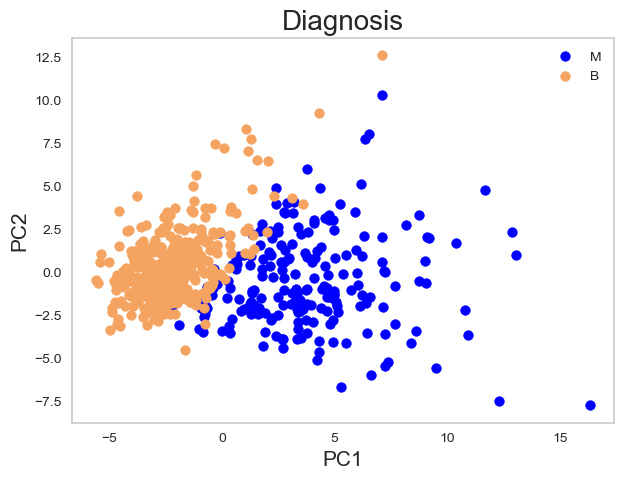

In [69]:
plot_pca(pca_df, "diagnosis")

In [51]:
import seaborn as sns
df = sns.load_dataset("iris")

In [52]:
y = df["species"] #multiclass bir sınıflandırma 
X = df.drop(["species"],axis=1) 

In [53]:
# gönderilen X değerlerinin hepsi sayısal değişken olmalı
pca_df_iris = create_pca_df(X,y)

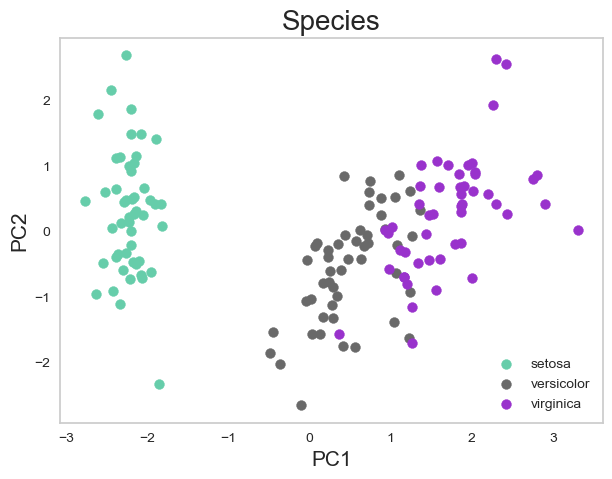

In [66]:
plot_pca(pca_df_iris,"species")

In [55]:
df = pd.read_csv("diabetes.csv")

In [56]:
y = df.Outcome
X = df.drop(["Outcome"],axis=1)

In [57]:
pca_df_dia = create_pca_df(X,y)

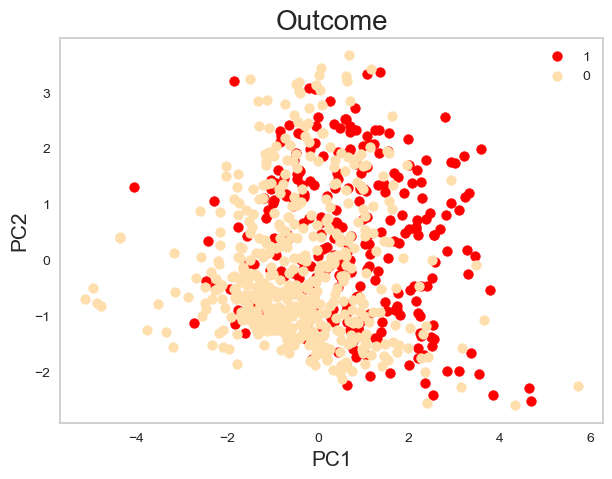

In [71]:
plot_pca(pca_df_dia,"Outcome")

In [59]:
# iris ve cancer sınıflandırma problemlerinde, sınıflarını birbirinden ayırmak daha kolay olabileceği gibi,
# diyabet veri setindeki sınıflar birbirinde daha zor ayrılır diyebiliriz.
# diyabetteki görselin iç içe geçmesinden ve diğerlerinin görseline bakarak bu yorumu yapabiliyoruz